In [41]:
#evaluation of the model
#base model randowm forest classifier

In [42]:
#load the model
import sys
import os
import joblib

# 1. Tell Python to look one level up for the 'src' folder
sys.path.append(os.path.abspath('..'))

# 2. Now load the model - Python will now find 'src' and succeed
model = joblib.load('../models/obesity_classifier_v2_optimized.pkl')

print("Model loaded successfully!")

Model loaded successfully!


In [43]:
#load the data
import pandas as pd
data = pd.read_csv('../data/ObesityDataSet_raw.csv')

In [44]:
#split test and train data first before EDA to avoid data leakage
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['NObeyesdad'])

In [45]:
#evaluate the model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 1. Load the "Vault" (Test Data)
X_test = test_data.drop('NObeyesdad', axis=1)
y_test = test_data['NObeyesdad'] 

--- Classification Report ---
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        54
      Normal_Weight       0.96      0.93      0.95        58
     Obesity_Type_I       0.99      0.97      0.98        70
    Obesity_Type_II       0.97      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.90      0.93      0.92        58
Overweight_Level_II       0.95      0.91      0.93        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



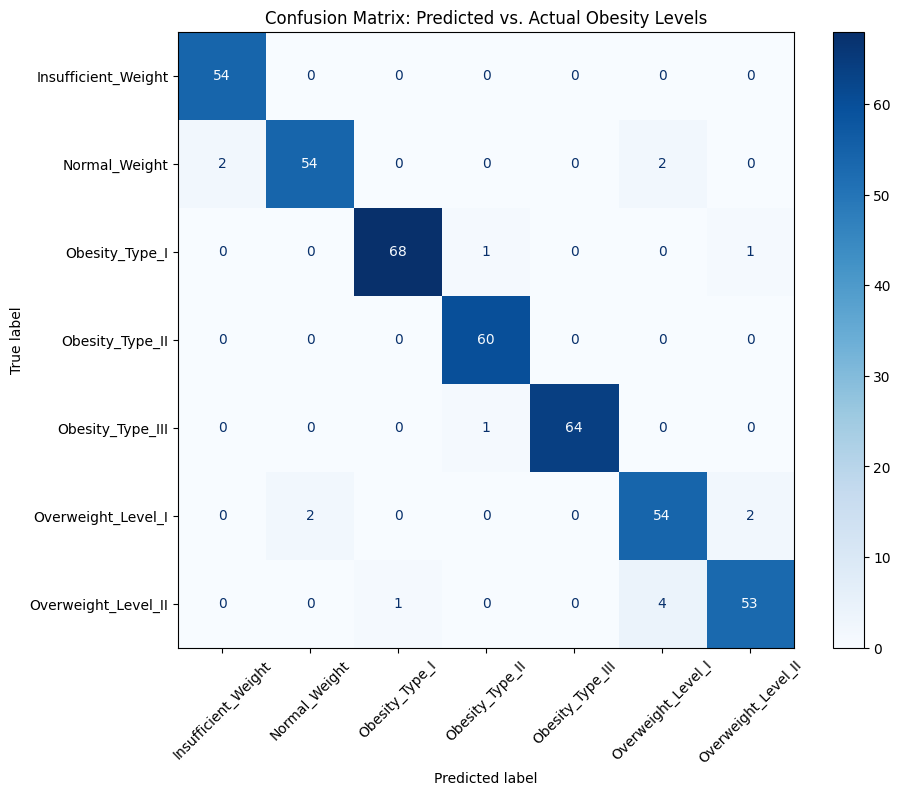

In [46]:
# Make predictions
y_pred = model.predict(X_test)

# Detailed Metrics
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax, xticks_rotation=45)
plt.title('Confusion Matrix: Predicted vs. Actual Obesity Levels')
plt.show()